In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [2]:
# Read the data
df = pd.read_csv('price_strategy.csv') # Read the data
df.head(), df.shape

(   Competitors_Price      Demand
 0           5.939322  993.716473
 1           7.436704  993.329599
 2           6.424870  993.499055
 3           5.903949  993.758589
 4           4.812893  993.679768,
 (100, 2))

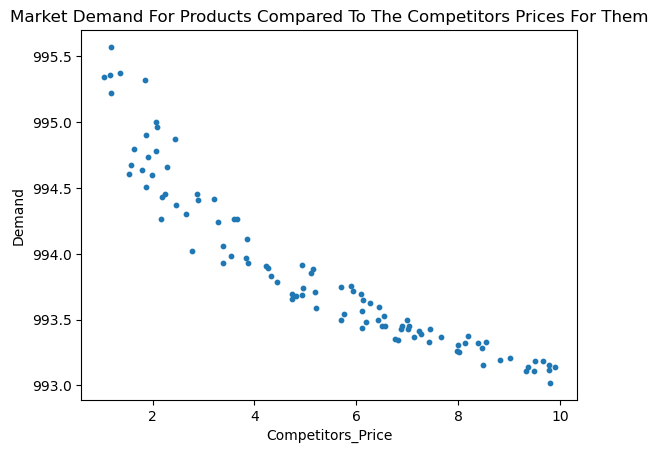

In [3]:
# Vizualize the data
plt.scatter(df['Competitors_Price'], df['Demand'], s=10) # Scatter plot
plt.xlabel('Competitors_Price')
plt.ylabel('Demand')
plt.title('Market Demand For Products Compared To The Competitors Prices For Them') # title the plot
plt.show()

In [4]:
# Separating the data and splitting it into training and test data

X = df['Competitors_Price'] # Feature
y = df['Demand'] # Target
X = X.values.reshape(-1,1) # Reshape the data
y = y.values.reshape(-1,1) # Reshape the data
print(X.shape,y.shape) # Check the shape of the data

(100, 1) (100, 1)


In [6]:
''' Split the data into training and test data '''
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42) # Split the data

In [9]:
# Build the model and predict on test values

linreg = LinearRegression() # Create a linear regression model
linreg.fit(X_train,y_train) # Fit the model

train_pred = linreg.predict(X_train) # Predict on training data
test_pred = linreg.predict(X_test) # Predict on test data
print(X_train.shape, train_pred.shape) # Check the shape of the data

(90, 1) (90, 1)


In [10]:
# Check and compare the metrics

print(f"RMSE train: {mean_squared_error(y_train, train_pred)**0.5}") # Root mean squared error of the training data
print(f"RMSE test: {mean_squared_error(y_test,test_pred)**0.5}") # Root mean squared error of the test data


print(f"MAE train: {mean_absolute_error(y_train,train_pred)}") # Mean absolute error of the training data
print(f"MAE test: {mean_absolute_error(y_test,test_pred)}") # Mean absolute error of the test data

RMSE train: 0.24266269382613825
RMSE test: 0.10495960540153917
MAE train: 0.18813950441243857
MAE test: 0.0718278041644794


In [11]:
''' Generate price points for prediction '''
prices = np.linspace(1, 10, 100).reshape(-1, 1) # Generate price points
predicted_demand = linreg.predict(prices) # Predict demand for the price points
print(prices.shape, predicted_demand.shape) # Check the shape of the data

(100, 1) (100, 1)


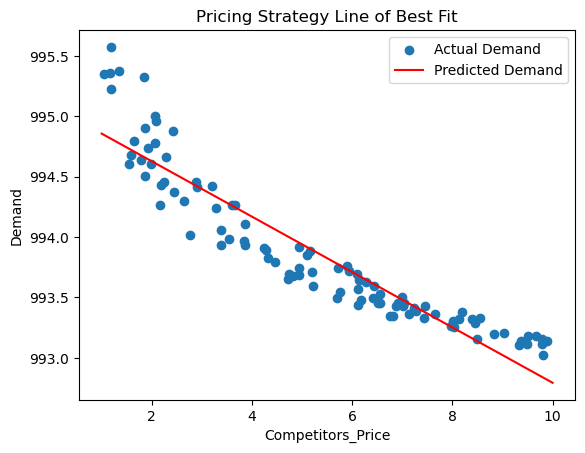

In [16]:
# Plot the regression line
plt.scatter(df['Competitors_Price'], df['Demand'], label='Actual Demand')
plt.plot(prices, predicted_demand, color='red', label='Predicted Demand')
plt.xlabel('Competitors_Price') # Label the x-axis
plt.ylabel('Demand') # Label the y-axis
plt.legend() # Show the legend
plt.title('Pricing Strategy Line of Best Fit') # Title the plot
plt.show() # Show the plot

1. The RMSE error I got for the training data is relatively low and it is similar for the test data. So, I conclude the model generalizes well for my case.

2. The data seems to be non-linear and so the line of best fit does not work well for this case. For example, for the products which are in the $1 to $2 range, we are missing out on the higher demand and similarly in the $9 to $10 range. Also in the price range in between, it looks like the pricing strategy is looking to tap into the max demand available and we could be under or overpricing our product.

We shall see how to solve this problem in a better way with some of the algorthms we will learn.

The above discussion is a simplistic analysis and the real world business scenarios are more complicated. However, this exercise should give you and idea of how ML works in the domain of price optimization.

In [18]:
# Decision Tree Regression Algorithm
decision_tree = DecisionTreeRegressor(max_depth=3) # Create the model and prune the tree
decision_tree.fit(X_train, y_train) # Fit the model
dt_pred = decision_tree.predict(prices) # Predict on the price points
print(prices.shape, dt_pred.shape) # Check the shape of the data

(100, 1) (100,)


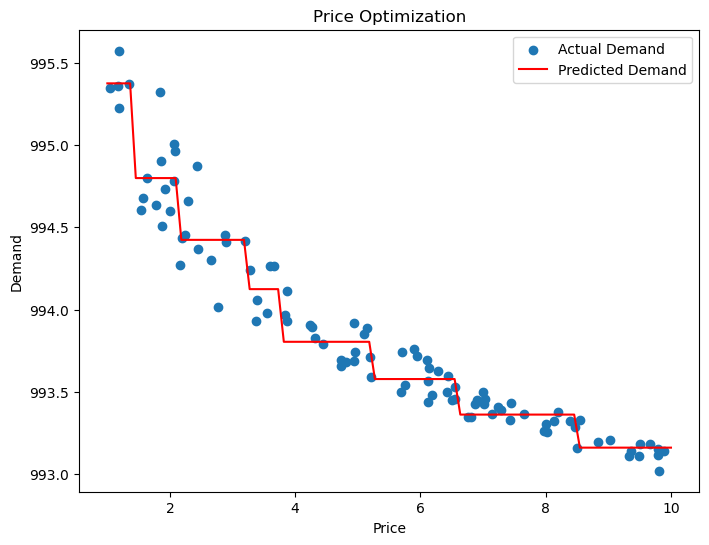

In [23]:
'''Plot Visualize the price-demand relationship'''
plt.figure(figsize=(8, 6)) # Set the figure size
plt.scatter(df['Competitors_Price'], df['Demand'], label='Actual Demand') # Scatter plot
plt.plot(prices, dt_pred, color='red', label='Predicted Demand') # Plot the regression line
plt.xlabel('Price') # Label the x-axis
plt.ylabel('Demand') # Label the y-axis
plt.title('Price Optimization') # Title the plot
plt.legend() # Show the legend
plt.show() # Show the plot

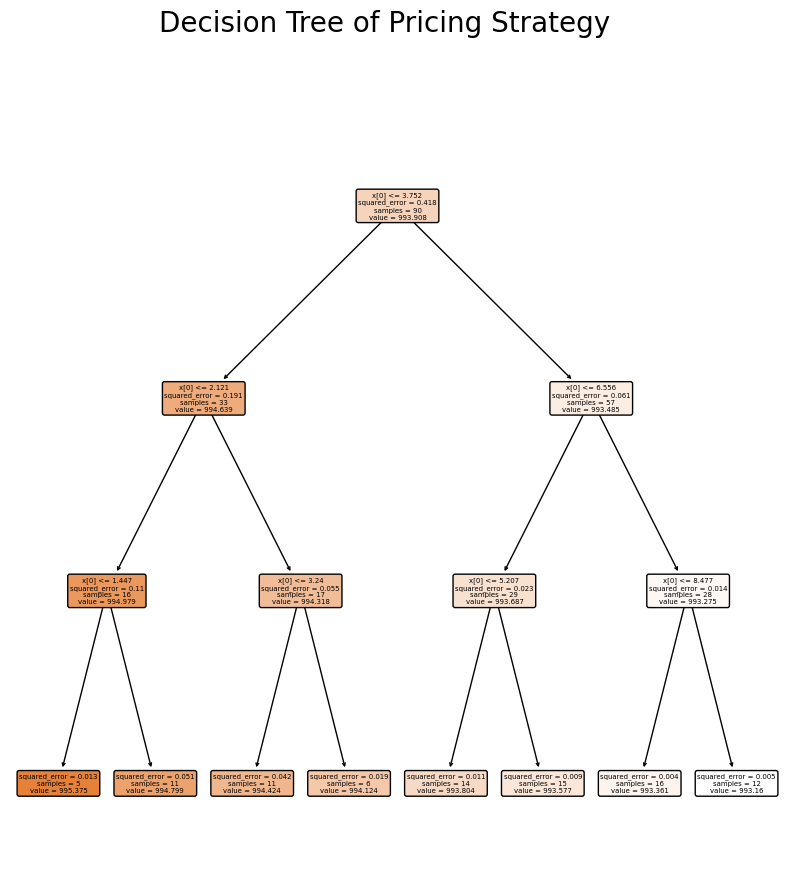

In [28]:
''' Plot the tree structure with higher resolution '''
plt.figure(figsize=(10,10)) # Set the figure size
plt.suptitle('Decision Tree of Pricing Strategy', fontsize=20) # Title the plot
plot_tree(decision_tree, filled=True, rounded=True, fontsize=5) # Plot the decision tree
plt.show() # Show the plot

### Model Comparison: Linear Regression vs. Decision Tree Regressor

1. What was the difference between the two models in terms of fitting the data?

The Linear Regression model with a polynomial feature fitted a best fit trend line to the data. The Decision Tree Regressor, on the other hand, fit the data in a stepwise manner using a set of rules that determines when a split should take place.

2. Which algorithm fit the data better and specifically – WHY?

Metrics Comparison:
- **Linear Regression RMSE train**: 0.16778050681118264
- **Linear Regression RMSE test**: 0.12794059521901943
- **Decision Tree RMSE train**:  0.11644237011549734
- **Decision Tree RMSE test**: 0.11358547987611455

- **Linear Regression MAE train**: 0.127514997150206
- **Linear Regression MAE test**: 0.10789578862938924
- **Decision Tree MAE train**: 0.08058538955611659
- **Decision Tree MAE test**: 0.088939503455950828

Originally, I did not prune my decision tree, which made my metrics substantially less than the linear regression algorithm. After prunning the max depth and sample size number before splitting, my metrics increased to only slightly below the linear regression's metrics. The libear regression algorithm fit the data better because the Decision Tree Regressor tends to overfit the data, which can be seen from the relatively low RMSE and MAE values on the training set. Additionally, its performance on the test set is often worse compared to Linear Regression, indicating that it does not generalize as well. Thus, linear regression with polynomial features is better than decision tree algorithm that is not pruned enough.